# EPRV 6: Sun-as-a-Star Splinter Part I

## Tutorial: Download HARPS-N solar data from DACE

This tutorial shows how to download HARPS-N solar data using the DACE Python API. To install the DACE API:

`pip install dace_query`

Let's start! First, import some needed packages.

In [1]:
from   astropy.io        import fits
from   astropy.time      import Time
from   dace_query.sun    import Sun
from   glob              import glob
import matplotlib.pyplot as     plt
import numpy             as     np
import os
import tarfile

Specify and create the output directory.

In [2]:
output_directory = 'sun_harpn_ccf/'
os.makedirs(output_directory, exist_ok=True)

Create some filters, query the solar database and download the DRS output files (in this case CCF).

Tip: If you don't know the filter keywords by heart, make a query based on the dates only and then list all the dictionary keywords from the query output.

In [3]:
# Filter: Barycentric Julian Date (BJD)
obj_date_bjd_min = Time('2018-07-01T00:00:00').jd-2400000
obj_date_bjd_max = Time('2018-07-01T23:59:59').jd-2400000

# Filter: Quality flag
spectro_analysis_qualflag_min = 0.95
spectro_analysis_qualflag_max = 1.00

# Filter dictionary
filters = {
'obj_date_bjd'             : {'min': obj_date_bjd_min             , 'max': obj_date_bjd_max             },
'spectro_analysis_qualflag': {'min': spectro_analysis_qualflag_min, 'max': spectro_analysis_qualflag_max},
}

# Query (optional: only to inspect the output before downloading it)
sun_query = Sun.query_database(filters=filters, sort={'obj_date_bjd': 'asc'})

# Download CCF files
Sun.download('ccf', filters=filters, output_directory=output_directory, output_filename='temp.tar', compressed=False)

# Unzip
tar = tarfile.open(output_directory+'temp.tar', 'r:')
tar.extractall(output_directory)
tar.close()

# Delete temporary file
os.remove(output_directory+'temp.tar')

2025-06-24 18:27:39,101 - INFO - Downloading file on location : sun_harpn_ccf/temp.tar


 Download : 7 MB

2025-06-24 18:27:39,708 - INFO - File downloaded on location : sun_harpn_ccf/temp.tar


 Download : 11 MB
Download done


Next, loop the downloaded FITS files and extract whatever data or header variable your analysis requires. Here, we extract the RVs.

In [4]:
# Files
files = glob(output_directory+'**/*.fits', recursive=True)
Nfile = len(files)

# Empty arrays for header variables
time_val = np.empty(Nfile)
vrad_val = np.empty(Nfile)
vrad_err = np.empty(Nfile)

# Loop files
for i in range(Nfile):

    # Open FITS file
    hdul = fits.open(files[i])

    # Extract header variables
    header = hdul[0].header
    time_val[i] = header['HIERARCH TNG QC BJD']
    vrad_val[i] = header['HIERARCH TNG QC CCF RV']
    vrad_err[i] = header['HIERARCH TNG QC CCF RV ERROR']

    # Close FITS file
    hdul.close()

Finally, plot the extracted data.

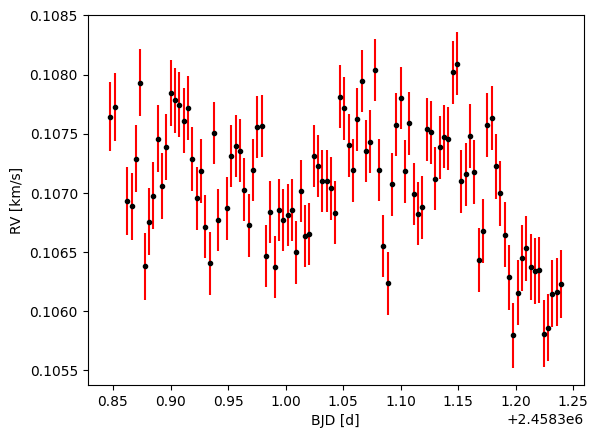

In [5]:
# RV time series
plt.figure()
plt.errorbar(time_val, vrad_val, vrad_err, fmt='.', color='k', ecolor='r')
plt.xlabel('BJD [d]')
plt.ylabel('RV [km/s]')
plt.show()